# CPSC 5240 Final Project Notebook
## Kyle Ford
## Logistic Regression Model Classifying the Outcome of NFL Matches

In [1]:
#Import libraries
import pandas as pd

In [2]:
#Import datasets

df_2010 = pd.read_csv("game_stats_2010.csv")
df_2011 = pd.read_csv("game_stats_2011.csv")
df_2012 = pd.read_csv("game_stats_2012.csv")
df_2013 = pd.read_csv("game_stats_2013.csv")
df_2014 = pd.read_csv("game_stats_2014.csv")
df_2015 = pd.read_csv("game_stats_2015.csv")
df_2016 = pd.read_csv("game_stats_2016.csv")
df_2017 = pd.read_csv("game_stats_2017.csv")
df_2018 = pd.read_csv("game_stats_2018.csv")
df_2019 = pd.read_csv("game_stats_2019.csv")

#print head of first dataframe (2010 season)
df_2010.head()

,Week,HomeTeam,AwayTeam,Total,H-RushAtt,H-RushYards,H-PassYards,H-Turnover,H-Score,A-RushAtt,A-RushYards,A-PassYards,A-Turnover,A-Score,Result
0,1,NOR,MIN,49.5,25,79,237,0,14,23,91,171,1,9,-1
1,1,BUF,MIA,39.0,17,50,139,0,10,36,132,182,0,15,-1
2,1,CHI,DET,45.0,31,101,372,4,19,21,20,171,3,14,-1
3,1,HOU,IND,48.0,42,257,107,1,34,10,44,433,1,24,1
4,1,JAX,DEN,41.5,34,134,170,0,24,25,89,295,2,17,-1


In [3]:
#print head of next dataframe to ensure columns match
df_2011.head()

,Week,HomeTeam,AwayTeam,Total,H-RushAtt,H-RushYards,H-PassYards,H-Turnover,H-Score,A-RushAtt,A-RushYards,A-PassYards,A-Turnover,A-Score,Result
0,1,GNB,NOR,48.0,27,103,312,0,42,21,81,419,1,34,1
1,1,CHI,ATL,41.0,27,88,312,1,30,14,110,319,3,12,1
2,1,CLE,CIN,36.5,26,83,213,1,17,33,139,173,0,27,1
3,1,ARI,CAR,37.5,25,99,309,1,28,27,74,422,1,21,1
4,1,HOU,IND,44.0,41,167,220,3,34,16,64,197,2,7,-1


In [4]:
#data preprocessing

#concatenate all dataframes to combine data from all seasons
df_combined = pd.concat([df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019])

#shuffle rows in dataframe to ensure proper training and testing samples
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop = True)

#print head of merged dataframe
df_combined.head()

,Week,HomeTeam,AwayTeam,Total,H-RushAtt,H-RushYards,H-PassYards,H-Turnover,H-Score,A-RushAtt,A-RushYards,A-PassYards,A-Turnover,A-Score,Result
0,16,CAR,ATL,46.0,25,141,312,4,10,21,194,239,2,24,-1
1,6,BUF,SFO,44.0,44,313,179,2,45,28,133,187,1,16,1
2,2,SDG,SEA,44.0,37,101,284,0,30,13,108,202,1,21,1
3,7,MIN,GNB,47.0,31,218,219,2,27,26,114,335,1,33,1
4,14,ARI,MIN,46.5,29,97,310,0,23,24,72,335,3,20,-1


In [5]:
#split dataset into features and target variable
feature_cols = ['H-RushYards', 'H-PassYards', 'H-Turnover', 'A-RushYards', 'A-PassYards', 'A-Turnover']
X = df_combined[feature_cols] #features
y = df_combined.Result #Target Variable

In [6]:
#Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

#75% of data used for model training, 25% for model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

In [7]:
#import LogisticRegression function from sklearn
from sklearn.linear_model import LogisticRegression

#instantiate the model using default parameters
logreg = LogisticRegression(random_state = 16)

#Fit the model
logreg.fit(X_train, y_train)

#use the model to predict
y_pred = logreg.predict(X_test)

In [8]:
#confusion matrix

#import metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[227,  85],
       [ 85, 243]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

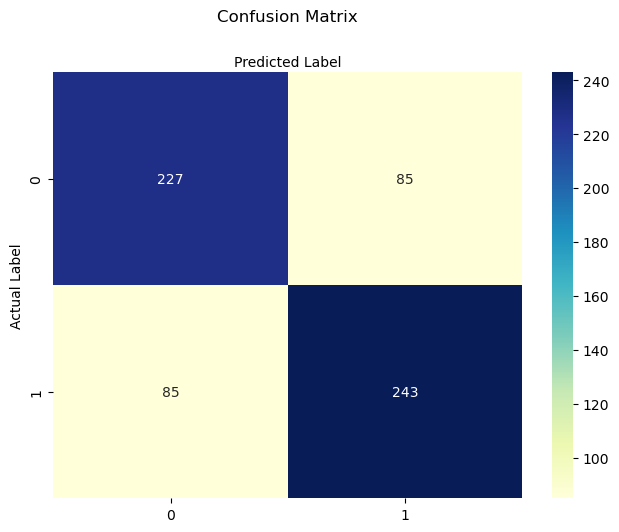

In [9]:
#visualize confusion matrix

#import classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [-1,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [10]:
#Evaluate confusion matrix
from sklearn.metrics import classification_report

target_names = ['Home team won', 'Away team won']
print(classification_report(y_test, y_pred, target_names = target_names))

               precision    recall  f1-score   support

Home team won       0.73      0.73      0.73       312
Away team won       0.74      0.74      0.74       328

     accuracy                           0.73       640
    macro avg       0.73      0.73      0.73       640
 weighted avg       0.73      0.73      0.73       640



In [11]:
#Evaluate accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.734375
